In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/AI TRAINING/gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [2]:
df.isnull().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


In [3]:
#encoding gender
df['gender']=df['gender'].map({'Male':1,'Female':0})
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [6]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['forehead_height_cm']=scaler.fit_transform(df[['forehead_height_cm']])
df['forehead_width_cm']=scaler.fit_transform(df[['forehead_width_cm']])
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,-1.247933,0.283971,1,0,1,1,1
1,0,0.739389,-1.009418,0,0,1,0,0
2,0,-1.247933,0.653511,1,1,1,1,1
3,0,1.100720,0.283971,0,1,1,1,1
4,1,0.287725,-0.085568,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,0.378057,-1.563727,0,0,0,0,0
4997,1,-1.157600,-1.009418,0,0,0,0,0
4998,1,-0.254272,-0.455108,0,0,0,0,0
4999,1,0.016726,0.468741,0,0,0,0,0


In [7]:
df.shape

(5001, 8)

In [8]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5.001000e+03,5.001000e+03,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,-1.224731e-15,2.671106e-16,0.493901,0.507898,0.493101,0.498900,0.49990
std,0.336748,1.000100e+00,1.000100e+00,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,-1.609264e+00,-1.563727e+00,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,-8.866017e-01,-8.246478e-01,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,-7.360651e-02,-8.556830e-02,0.000000,1.000000,0.000000,0.000000,0.00000
75%,1.000000,7.393887e-01,8.382811e-01,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,2.094381e+00,2.131670e+00,1.000000,1.000000,1.000000,1.000000,1.00000


In [9]:
x=df.drop('gender',axis=1)
y=df['gender']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [12]:
y_pred=model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.962037962037962
[[486  16]
 [ 22 477]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



In [14]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
scores

array([0.95804196, 0.963     , 0.977     , 0.973     , 0.976     ])

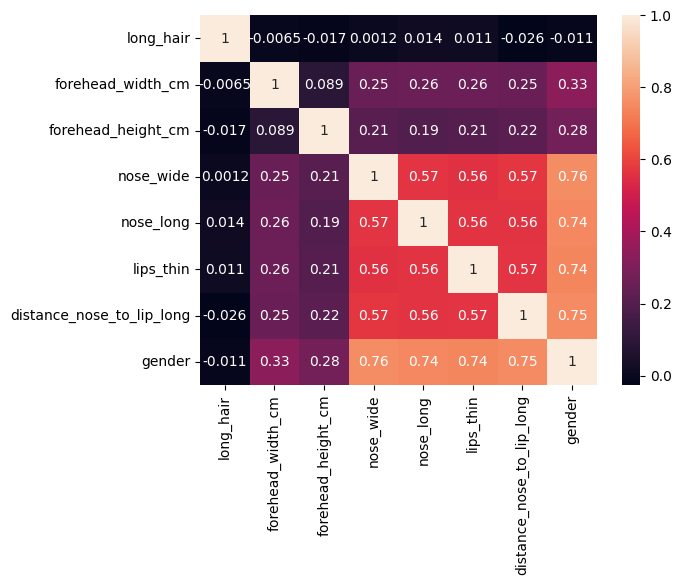

In [15]:
#random forest plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
#chart analysis plot

df['gender'].value_counts()

,count
gender,
0,2501
1,2500


/tmp/ipython-input-4259201449.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='viridis')


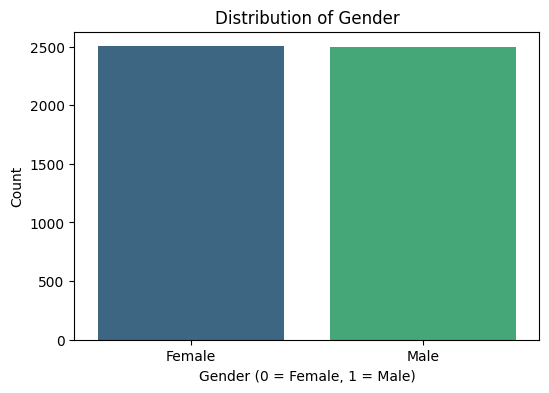

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()